In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Load the dataset from the CSV file
dataset = pd.read_csv('EnglandWeather.csv', parse_dates=['Formatted Date'])

# Ensure the 'Formatted Date' column is set as the index
dataset.set_index('Formatted Date', inplace=True)

dataset.index = dataset.index + pd.DateOffset(years=6)

# Convert the index to datetime, ensuring it's in UTC if it's timezone-aware
dataset.index = pd.to_datetime(dataset.index, utc=True)

# Extract useful date features if needed
dataset['Hour'] = dataset.index.hour
dataset['Day'] = dataset.index.day
dataset['Month'] = dataset.index.month
dataset['Year'] = dataset.index.year

# Define features and target
features = dataset[['Summary', 'Precip Type', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity', 'Hour', 'Day', 'Month', 'Year']]
target = dataset['Temperature (C)']

# Preprocess categorical features using One-Hot Encoding
categorical_features = ['Summary', 'Precip Type']
numerical_features = ['Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity', 'Hour', 'Day', 'Month', 'Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Pull out distinct categorical values for each categorical field
distinct_values = {}
for column in categorical_columns:
    distinct_values[column] = dataset[column].unique()

# Display distinct values for each categorical field
for column, values in distinct_values.items():
    print(f"Distinct values in '{column}':")
    print(values)
    print("\n")

Distinct values in 'Summary':
['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Breezy and Overcast' 'Breezy and Mostly Cloudy' 'Windy and Overcast'
 'Windy and Foggy' 'Breezy and Foggy' 'Breezy and Partly Cloudy'
 'Windy and Partly Cloudy' 'Humid and Mostly Cloudy'
 'Humid and Partly Cloudy' 'Breezy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Breezy and Dry' 'Dry and Mostly Cloudy'
 'Light Rain' 'Drizzle' 'Windy and Dry' 'Rain']


Distinct values in 'Precip Type':
['rain' 'snow' nan]




In [ ]:
pip install sweetviz

In [ ]:
# Summary statistics
print(dataset.describe())

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)      Humidity  \
count     96453.000000       96453.000000          96453.000000  96453.000000   
mean         11.932678          10.810640           1003.235956      0.734899   
std           9.551546           6.913571            116.969906      0.195473   
min         -21.822222           0.000000              0.000000      0.000000   
25%           4.688889           5.828200           1011.900000      0.600000   
50%          12.000000           9.965900           1016.450000      0.780000   
75%          18.838889          14.135800           1021.090000      0.890000   
max          39.905556          63.852600           1046.380000      1.000000   

               Hour           Day         Month         Year  
count  96453.000000  96453.000000  96453.000000  96453.00000  
mean      11.499891     15.726354      6.523001   2017.00029  
std        6.922049      8.801136      3.448501      3.16216  
min        0.00000

In [ ]:
import sweetviz as sv
report = sv.analyze(dataset)


                                             |          | [  0%]   00:00 -> (? left)


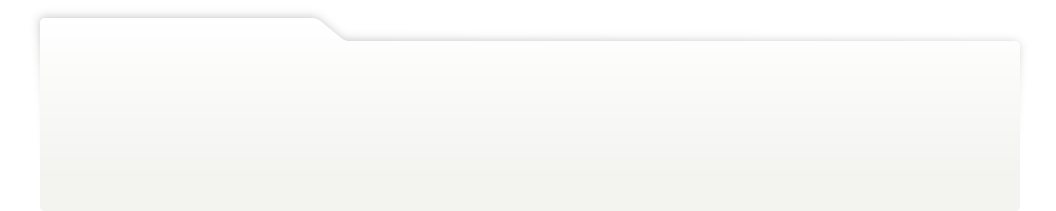
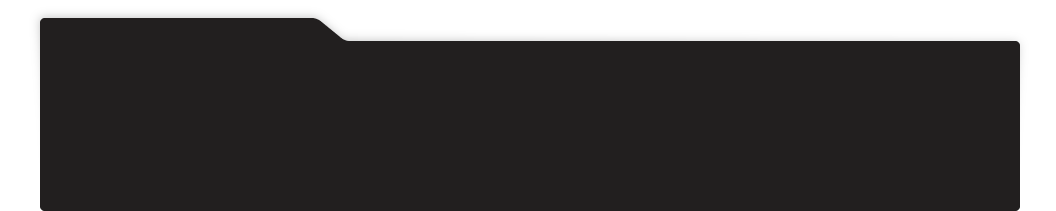
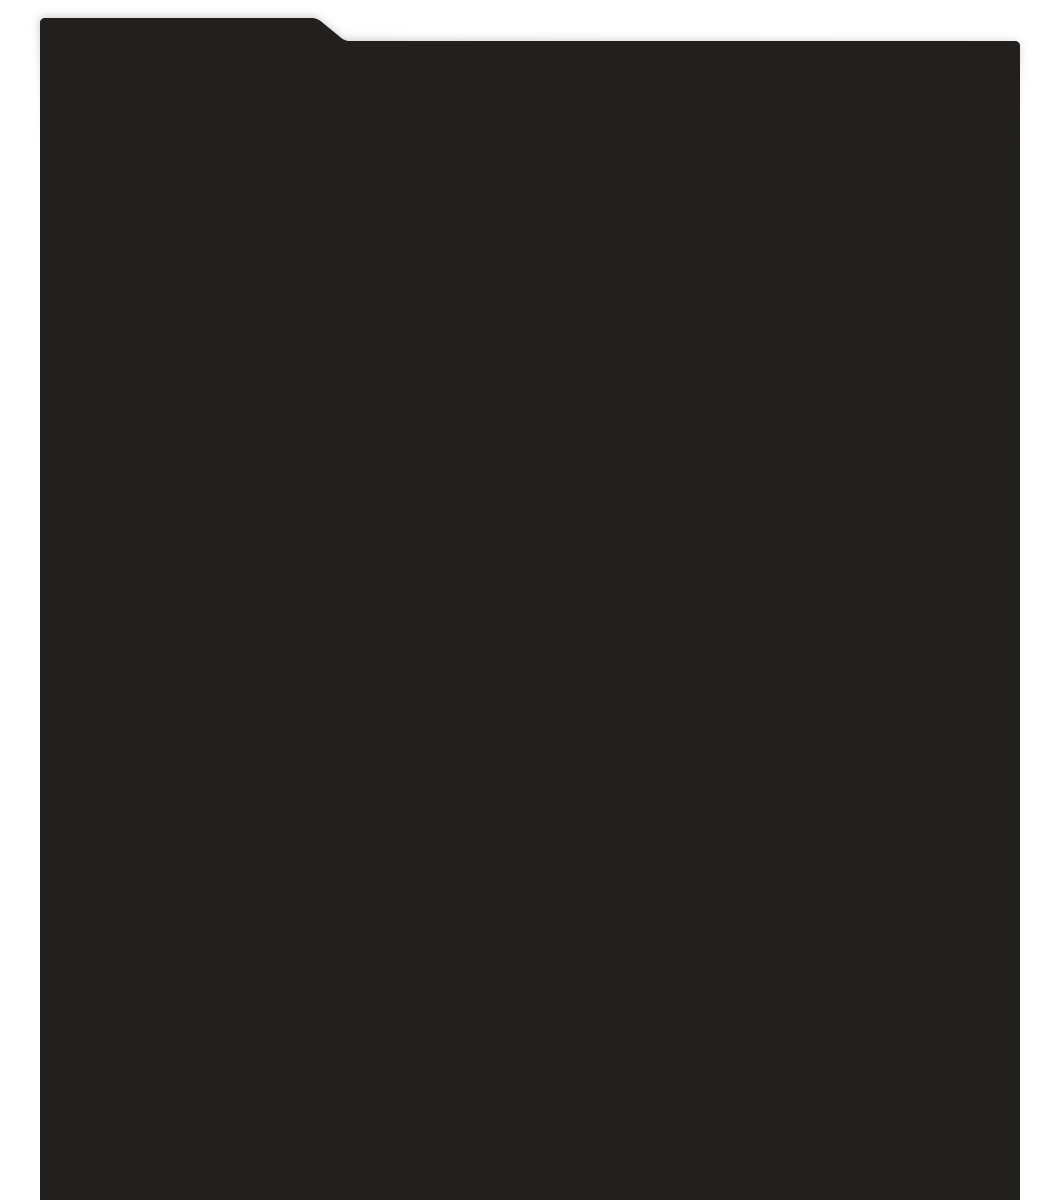
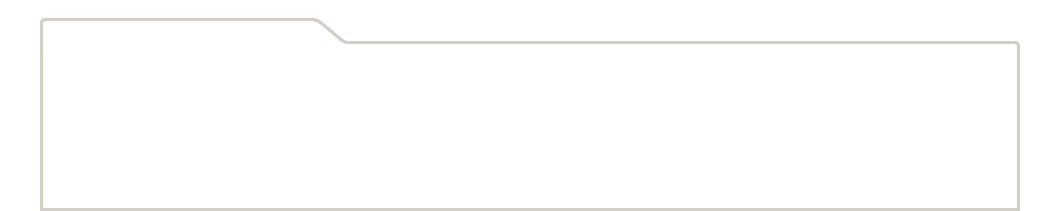
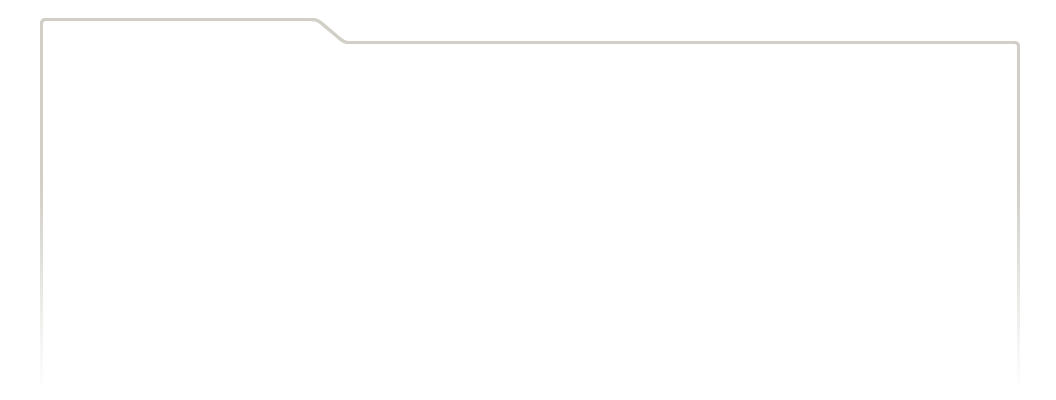
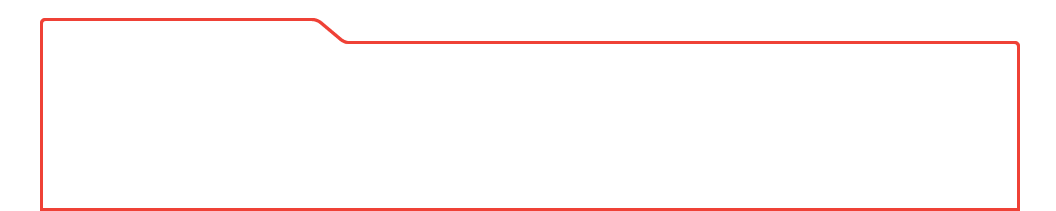
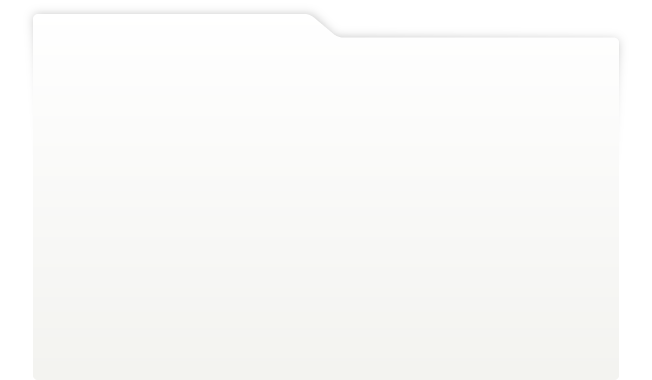
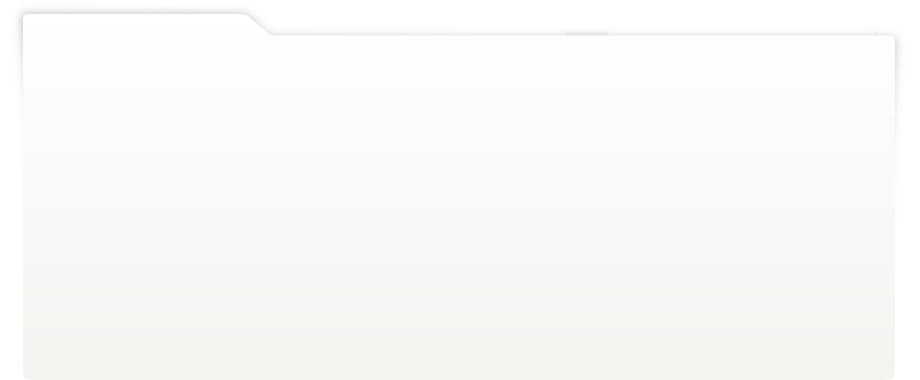
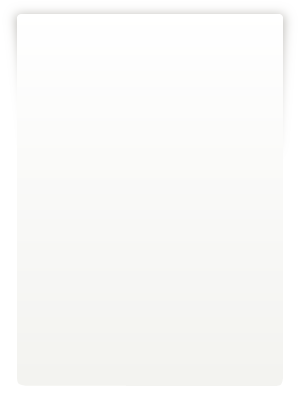
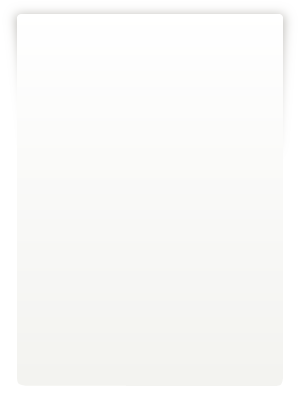
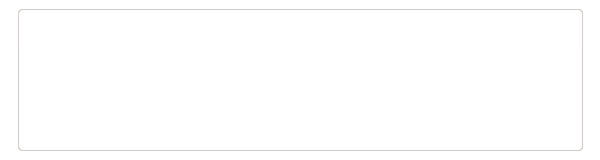
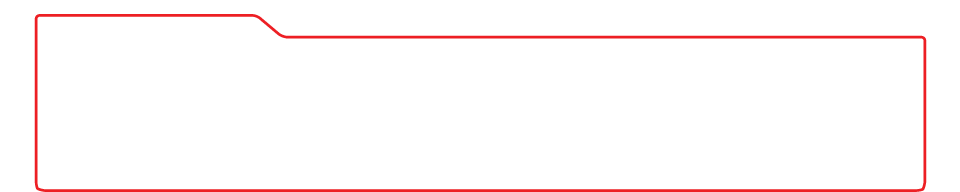
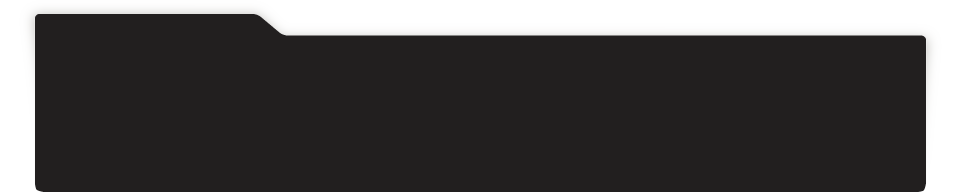
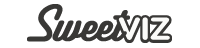
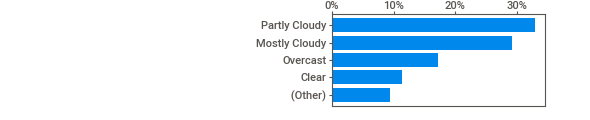
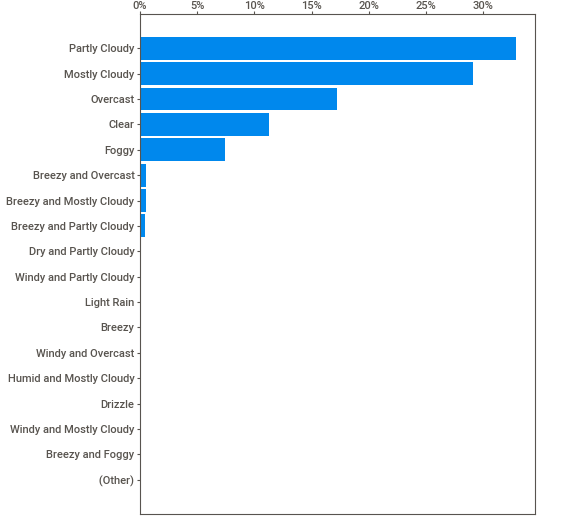
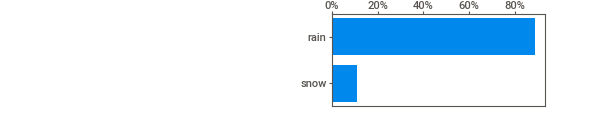
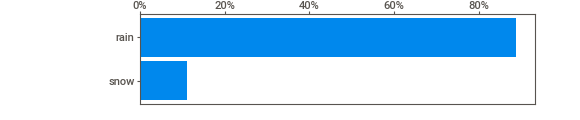
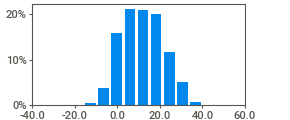
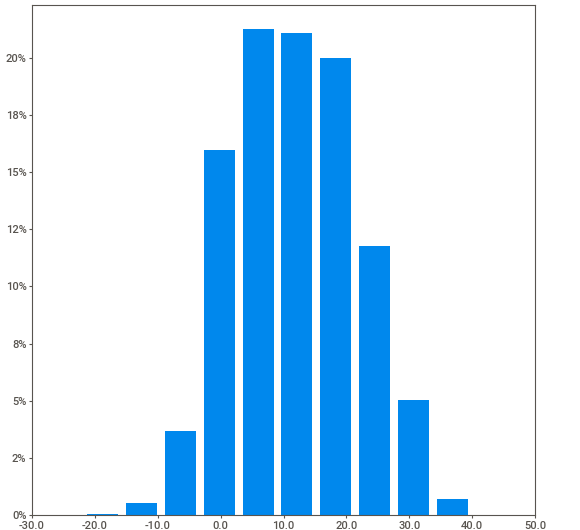
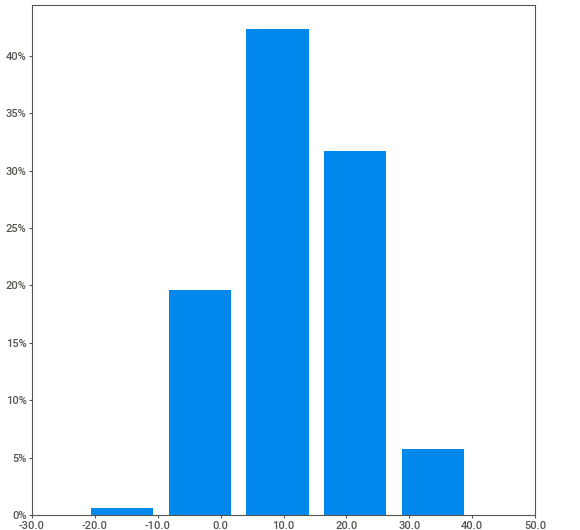
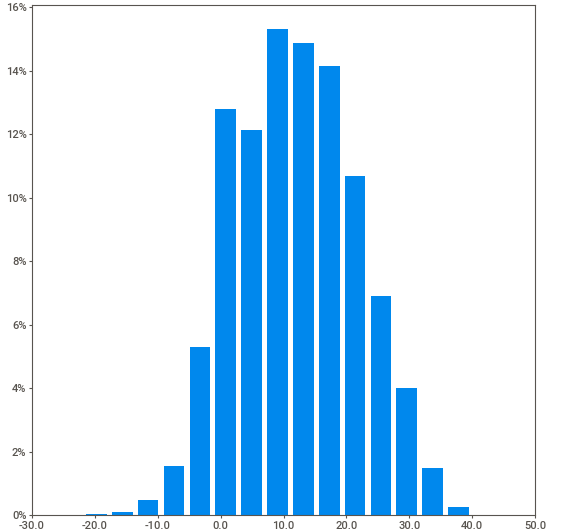
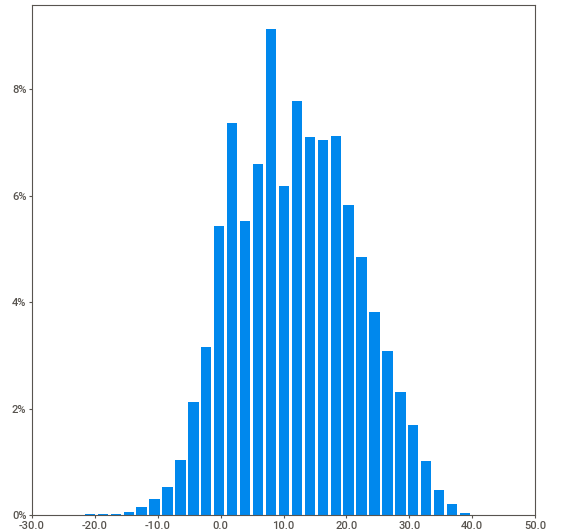
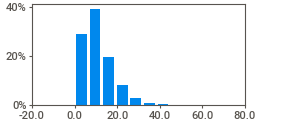
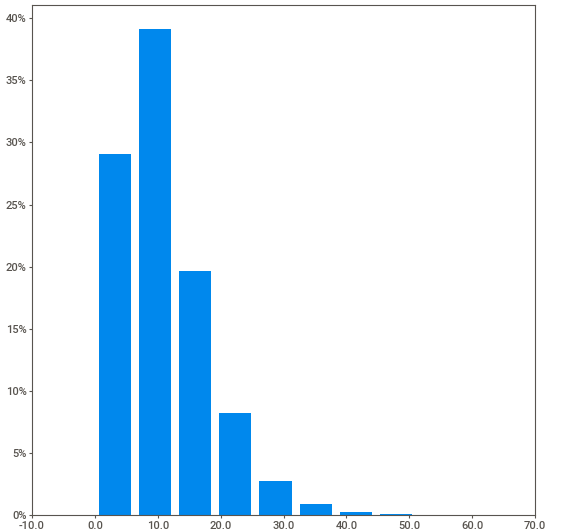
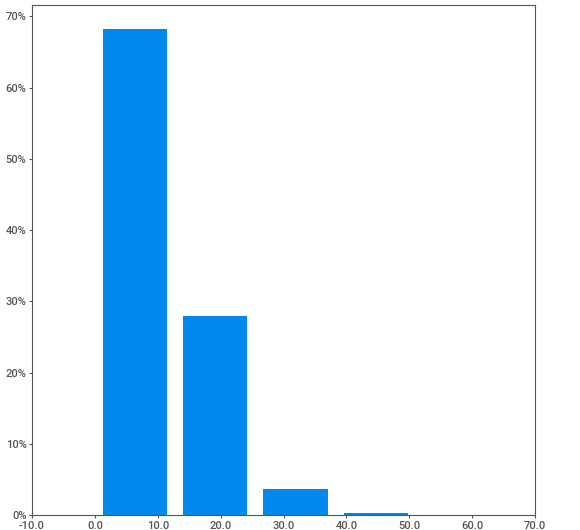
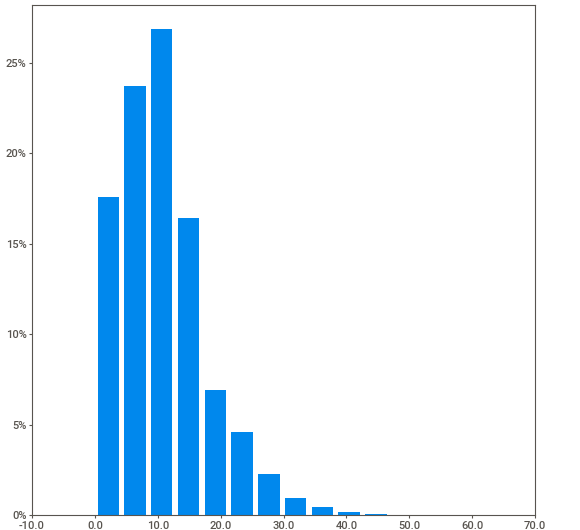
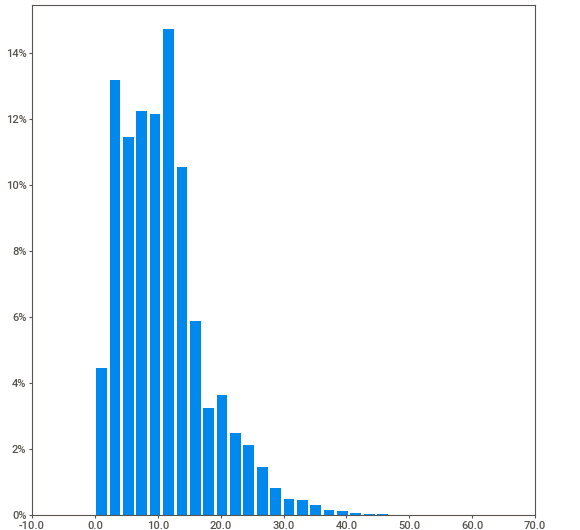
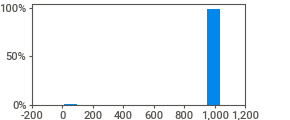
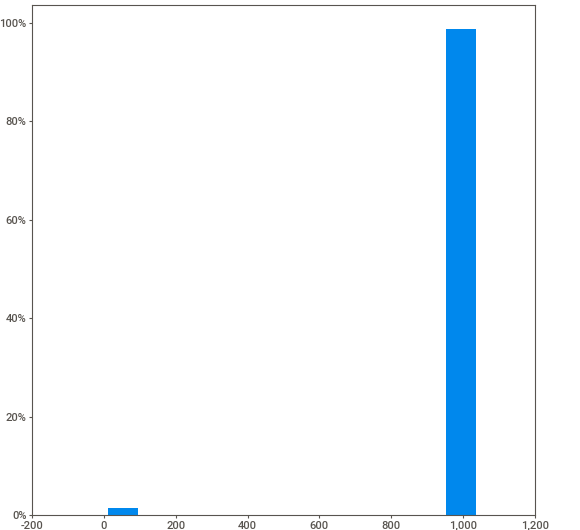
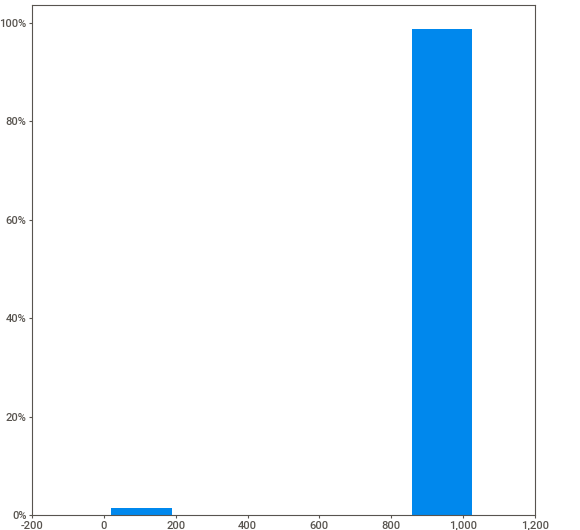
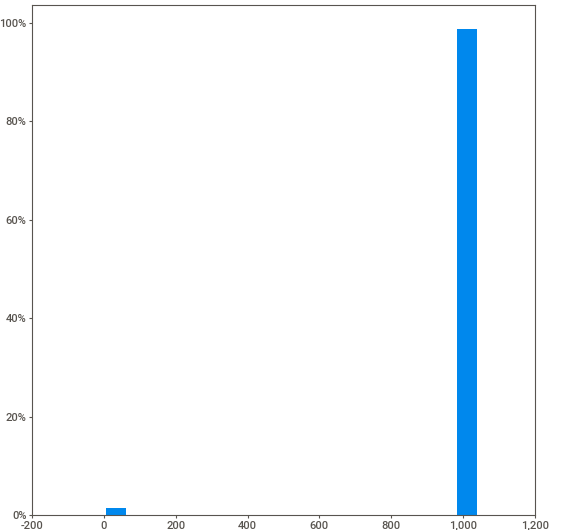
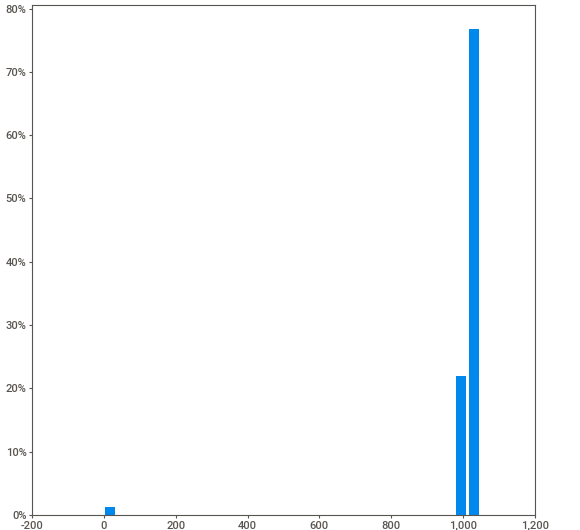
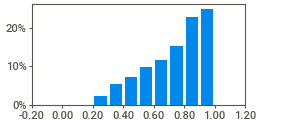
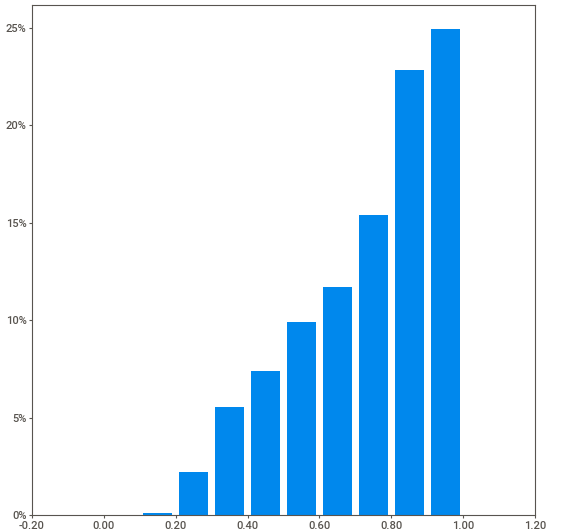
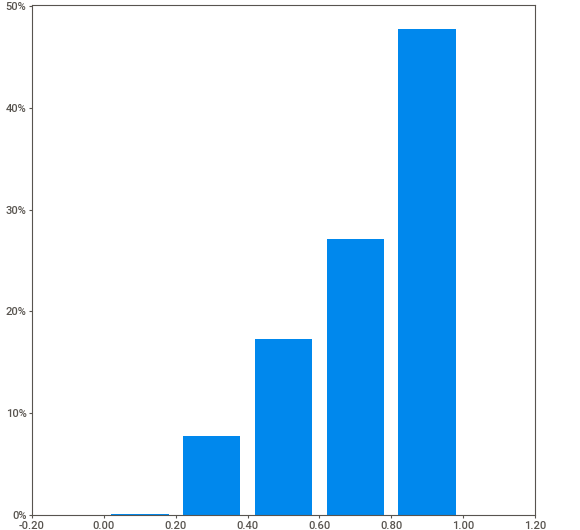
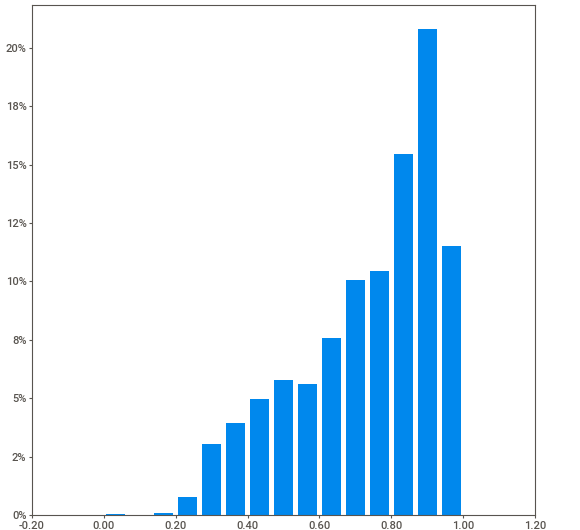
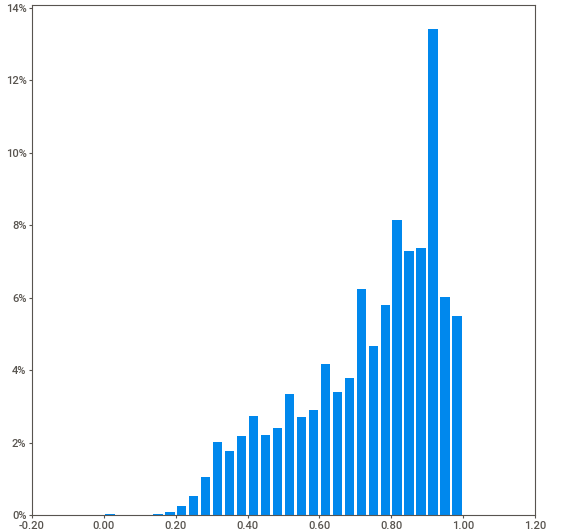
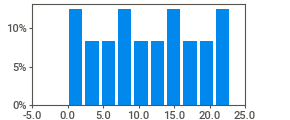
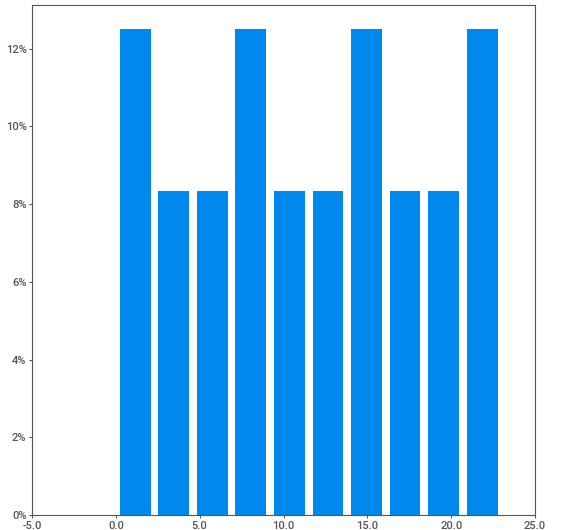
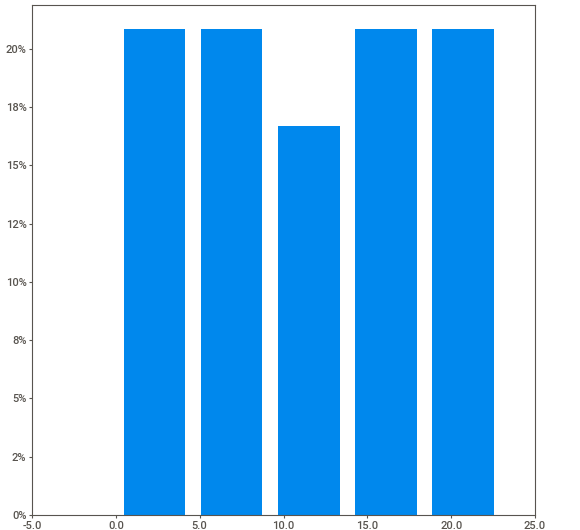
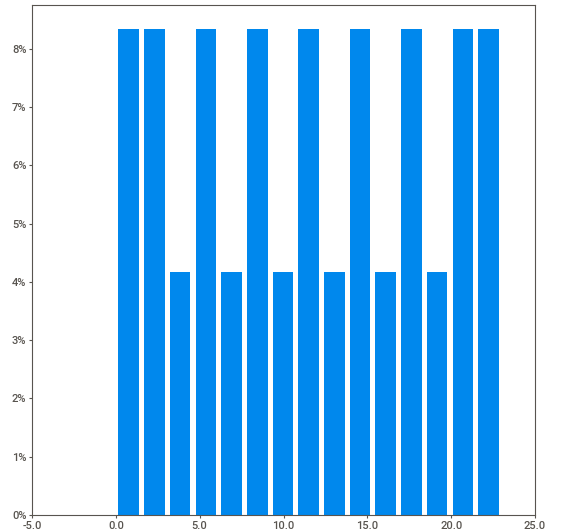
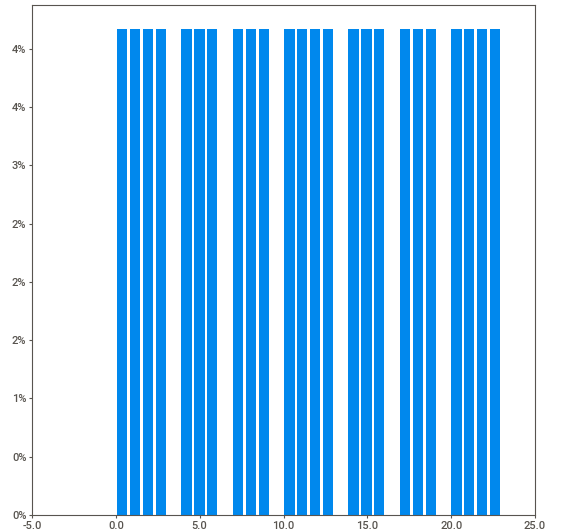
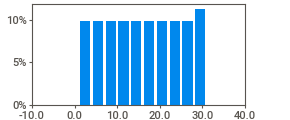
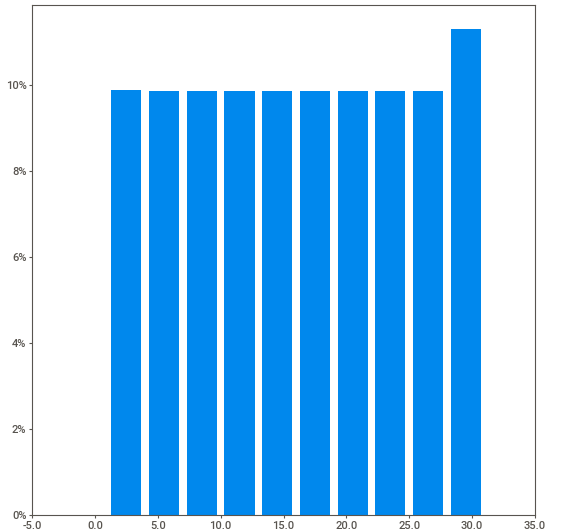
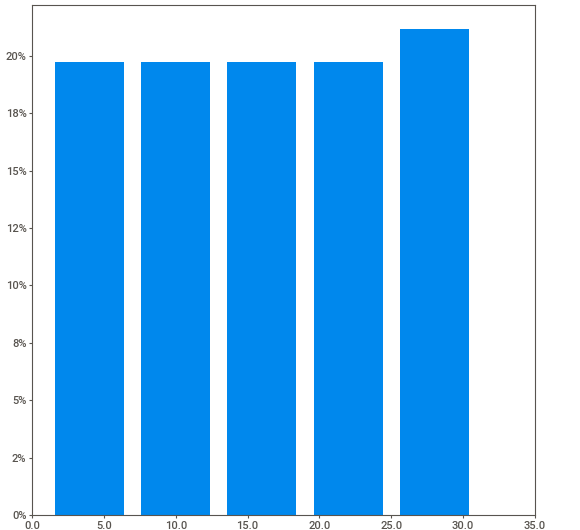
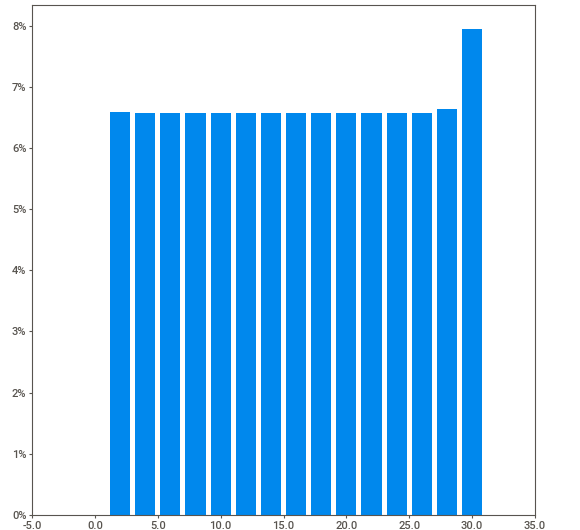
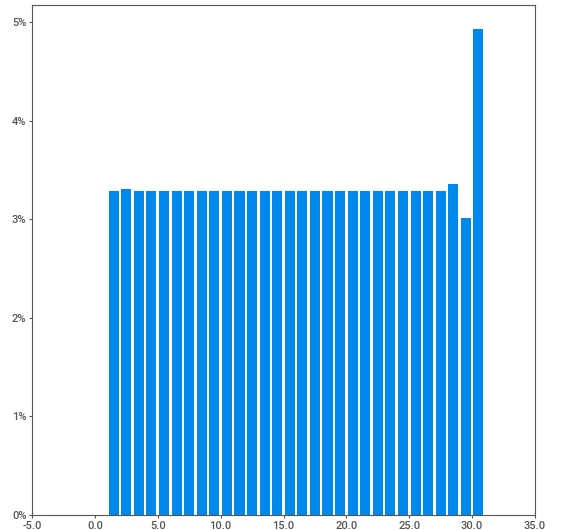
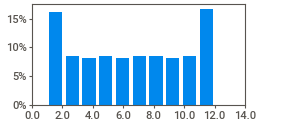
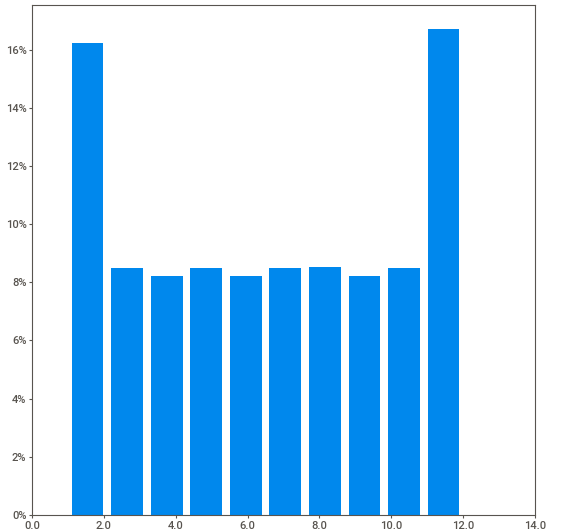
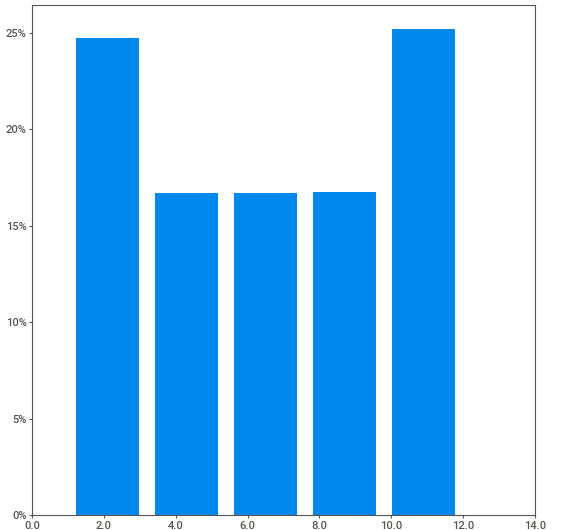
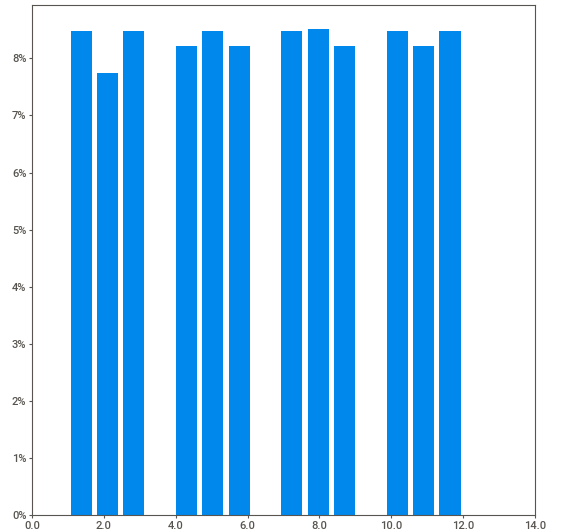
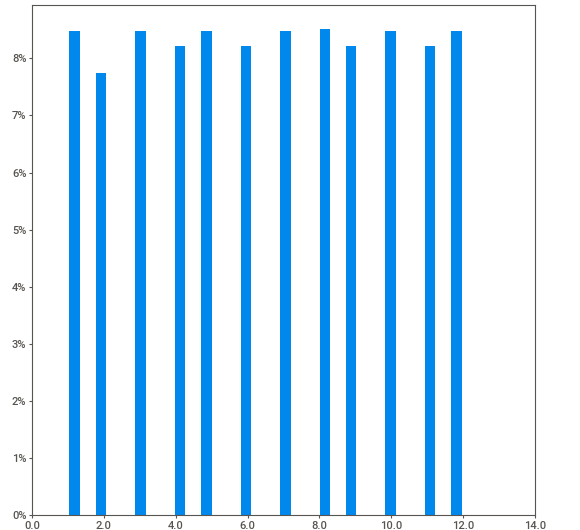
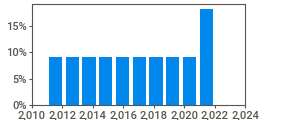
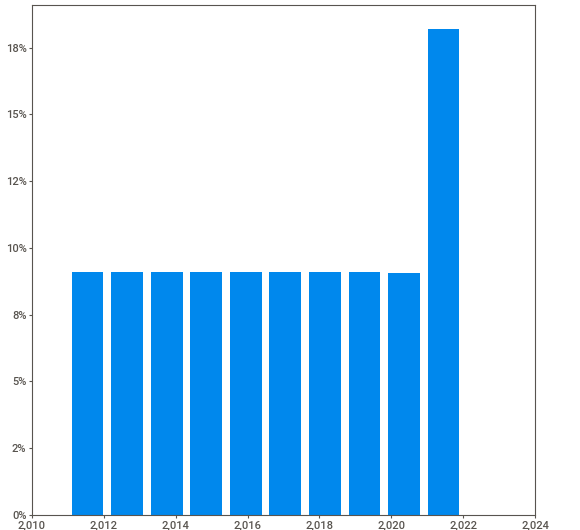
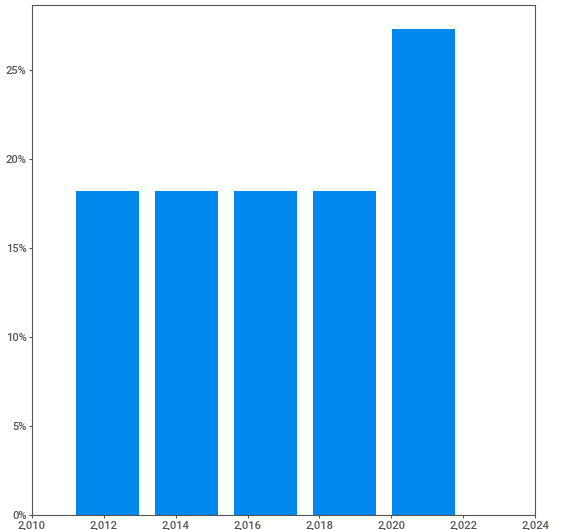
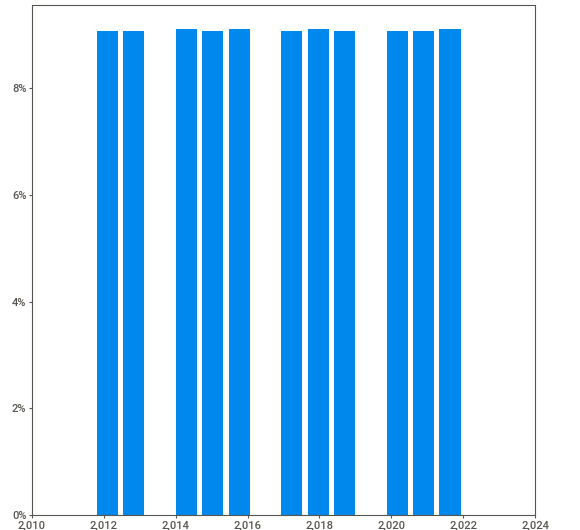
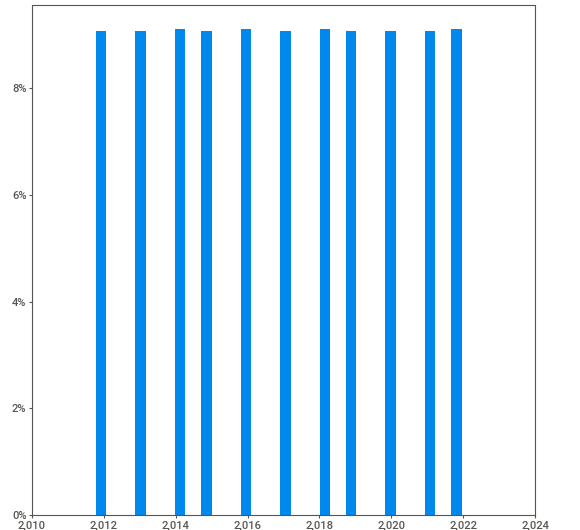
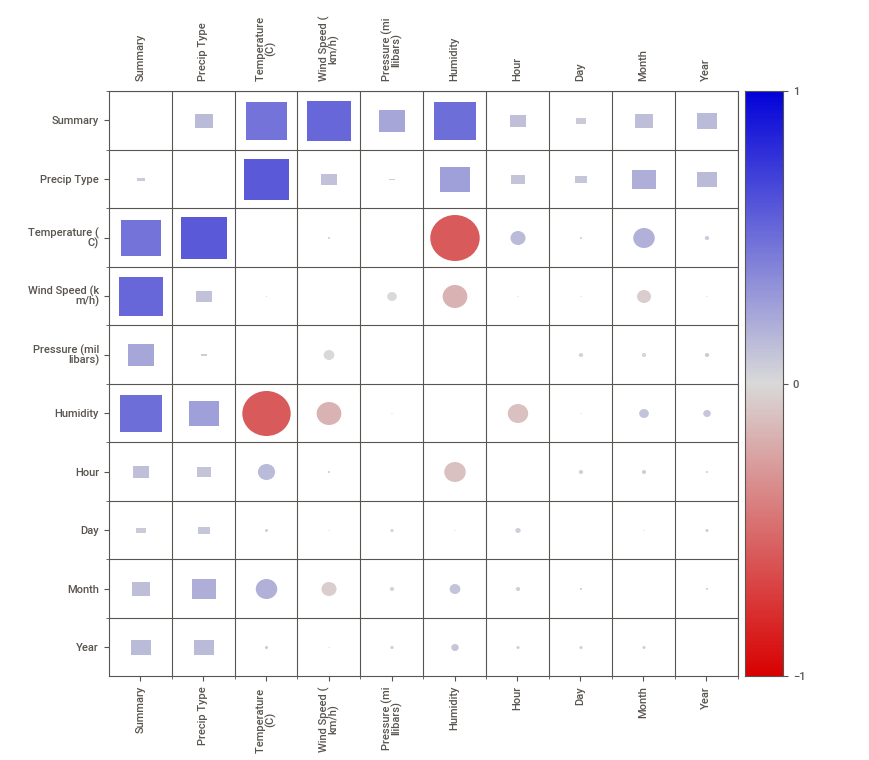
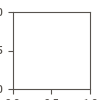

In [ ]:
report.show_notebook()

In [ ]:
# Display the first few rows of the dataset to understand its structure
print(dataset.head())

# Summary statistics
print(dataset.describe())

                                 Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2011-12-31 23:00:00+00:00  Partly Cloudy        rain         0.577778   
2012-01-01 00:00:00+00:00  Mostly Cloudy        rain         1.161111   
2012-01-01 01:00:00+00:00  Mostly Cloudy        rain         1.666667   
2012-01-01 02:00:00+00:00       Overcast        rain         1.711111   
2012-01-01 03:00:00+00:00  Mostly Cloudy        rain         1.183333   

                           Wind Speed (km/h)  Pressure (millibars)  Humidity  \
Formatted Date                                                                 
2011-12-31 23:00:00+00:00            17.1143               1016.66      0.89   
2012-01-01 00:00:00+00:00            16.6152               1016.15      0.85   
2012-01-01 01:00:00+00:00            20.2538               1015.87      0.82   
2012-01-01 02:00:00+00:00            14.4900               1015.56      0.82   
2012-01-

In [ ]:
# Monthly average temperature
dataset['Month'] = dataset.index.month
monthly_avg_temp = dataset.groupby('Month')['Temperature (C)'].mean()

data = {
    'Formatted Date': pd.date_range(start='1/1/2006', periods=365, freq='D'),
    'Summary': ['Clear', 'Rain', 'Snow', 'Cloudy'] * 91 + ['Clear'],
    'Precip Type': ['rain', 'snow', 'rain', 'rain'] * 91 + ['snow'],
    'Temperature (C)': np.random.rand(365) * 20 + 5,
    'Wind Speed (km/h)': np.random.rand(365) * 10 + 2,
    'Pressure (millibars)': np.random.rand(365) * 10 + 1010,
    'Humidity': np.random.rand(365) * 50 + 30,
}

dataset = pd.DataFrame(data)

###EDA

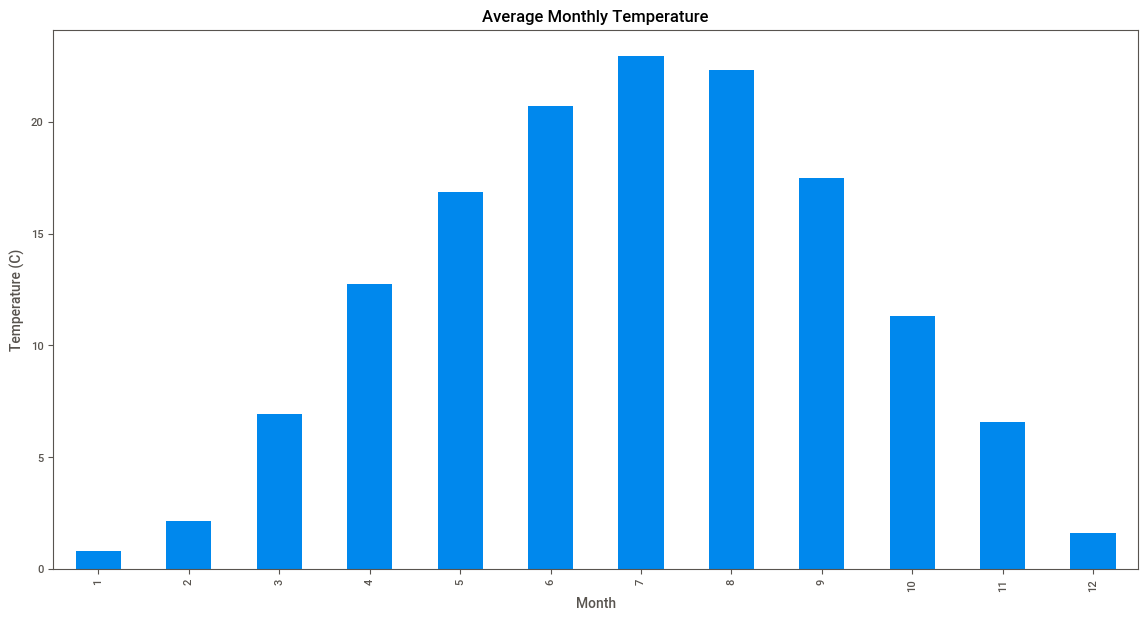

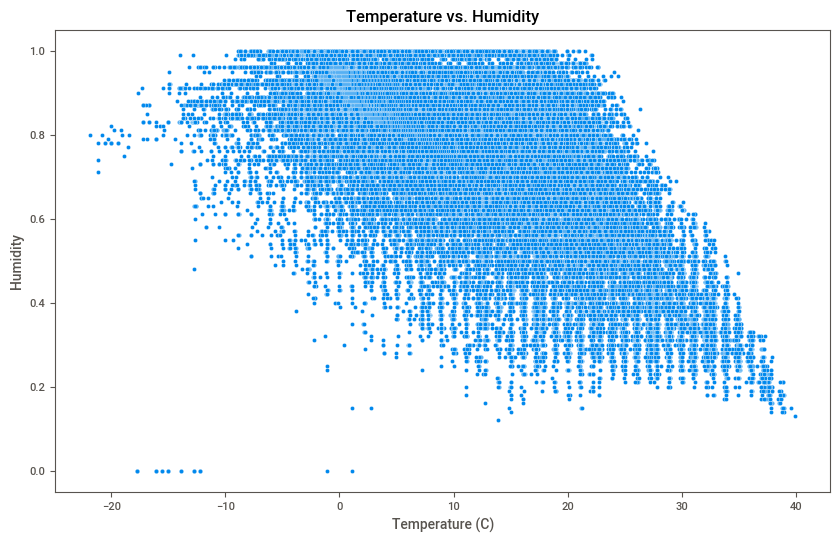

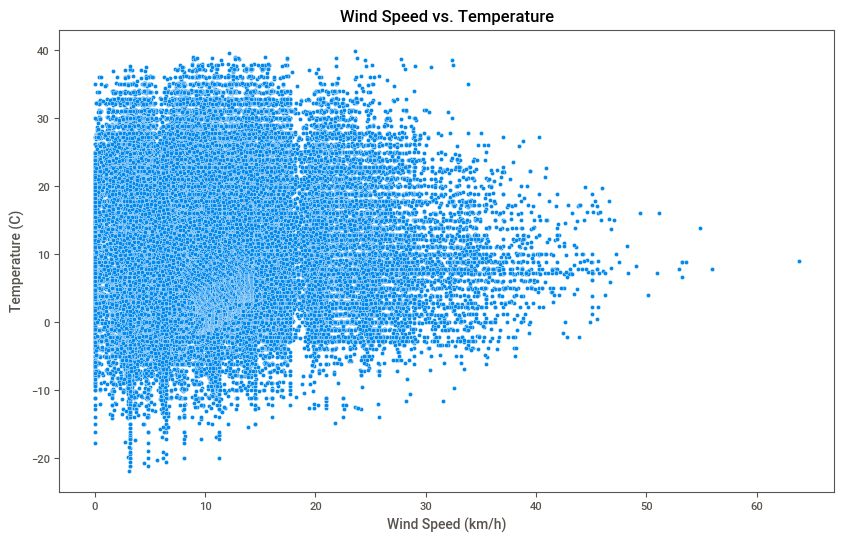

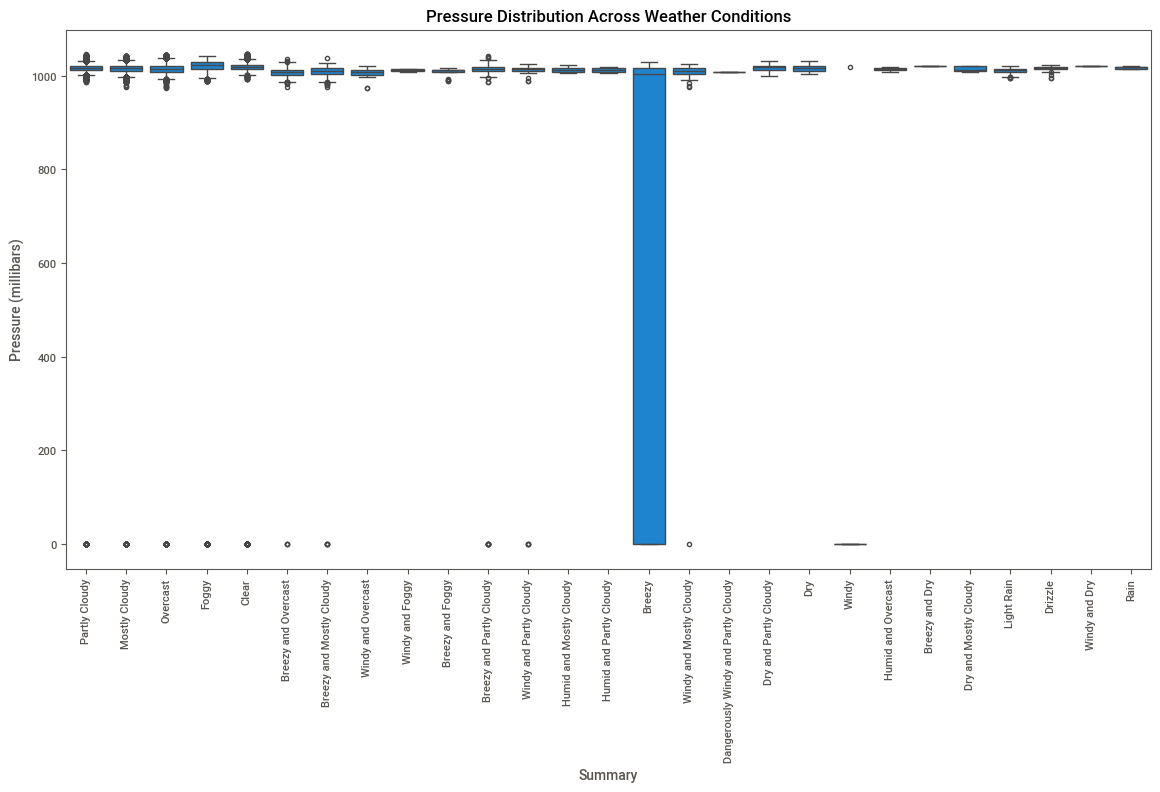

In [ ]:
plt.figure(figsize=(14, 7))
monthly_avg_temp.plot(kind='bar')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

# Temperature vs. Humidity scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Temperature (C)', y='Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

# Wind Speed vs. Temperature scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Wind Speed (km/h)', y='Temperature (C)')
plt.title('Wind Speed vs. Temperature')
plt.show()

# Pressure distribution across weather conditions
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataset, x='Summary', y='Pressure (millibars)')
plt.title('Pressure Distribution Across Weather Conditions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Anomaly detection: High wind speed events (top 5%)
high_wind_speed_events = dataset[dataset['Wind Speed (km/h)'] > dataset['Wind Speed (km/h)'].quantile(0.95)]
print("High Wind Speed Events:")
print(high_wind_speed_events[['Summary', 'Wind Speed (km/h)', 'Temperature (C)', 'Humidity']])

High Wind Speed Events:
                                       Summary  Wind Speed (km/h)  \
Formatted Date                                                      
2012-01-01 06:00:00+00:00        Mostly Cloudy            25.4219   
2012-01-01 13:00:00+00:00        Partly Cloudy            24.8423   
2012-01-01 14:00:00+00:00        Mostly Cloudy            27.5954   
2012-01-01 17:00:00+00:00             Overcast            25.9371   
2012-01-01 18:00:00+00:00             Overcast            25.4058   
...                                        ...                ...   
2022-10-04 13:00:00+00:00             Overcast            24.6169   
2022-10-04 20:00:00+00:00             Overcast            25.8727   
2022-10-04 21:00:00+00:00  Breezy and Overcast            29.1249   
2022-10-20 10:00:00+00:00        Partly Cloudy            25.5024   
2022-10-20 11:00:00+00:00        Partly Cloudy            24.5042   

                           Temperature (C)  Humidity  
Formatted Date         

In [ ]:
# Modeling example: Predicting temperature based on other variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature selection
features = dataset[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
target = dataset['Temperature (C)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_lr = r2_score(y_test, y_pred)
print(r2_lr)

0.4126988817852302


#### R2 scrore value is less than 50%, model does not explain significantly.

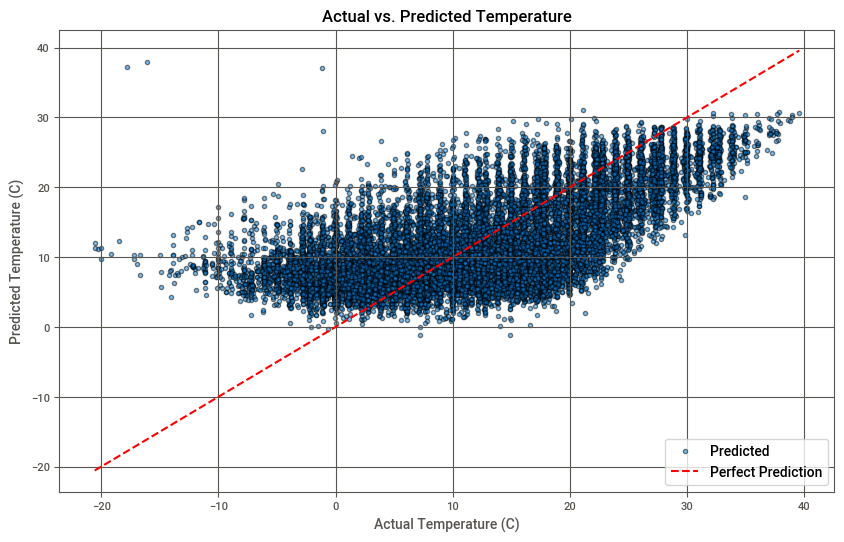

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k', label='Predicted')

# Add a line for perfect prediction
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

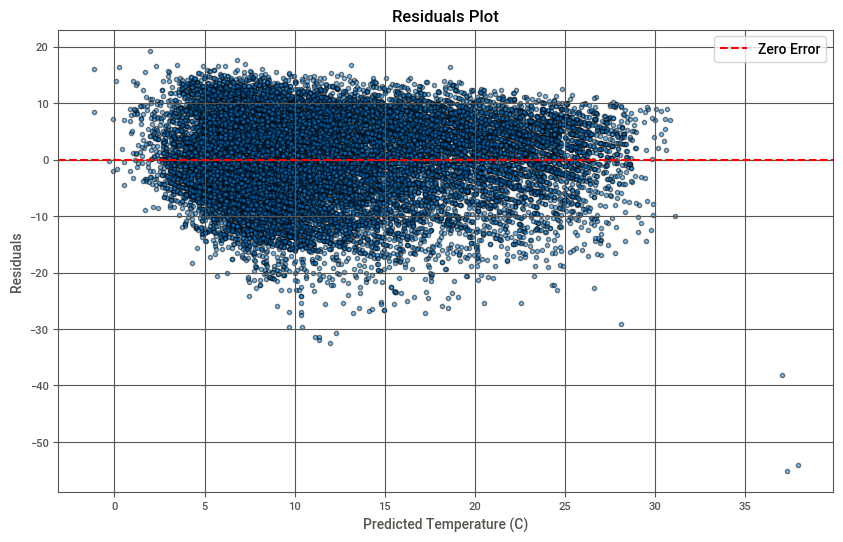

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Predicted Temperature (C)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


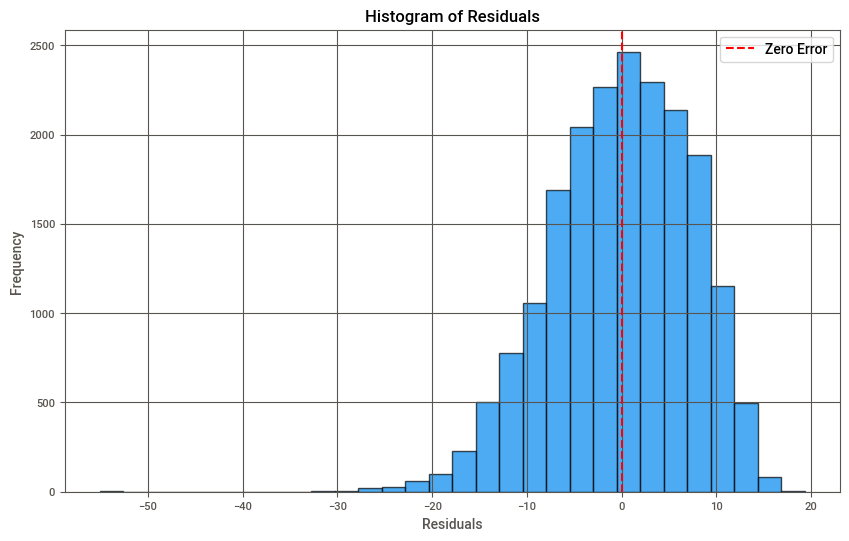

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.grid(True)
plt.show()


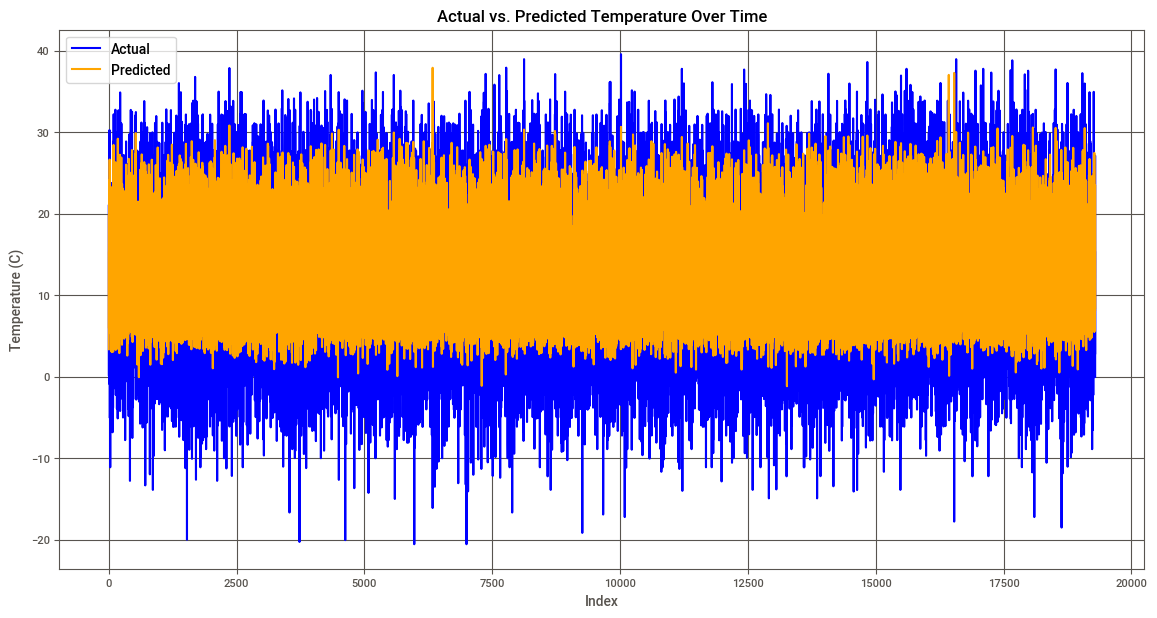

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Actual vs. Predicted Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-20-a3bfd8ea2d13>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
<ipython-input-20-a3bfd8ea2d13>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)


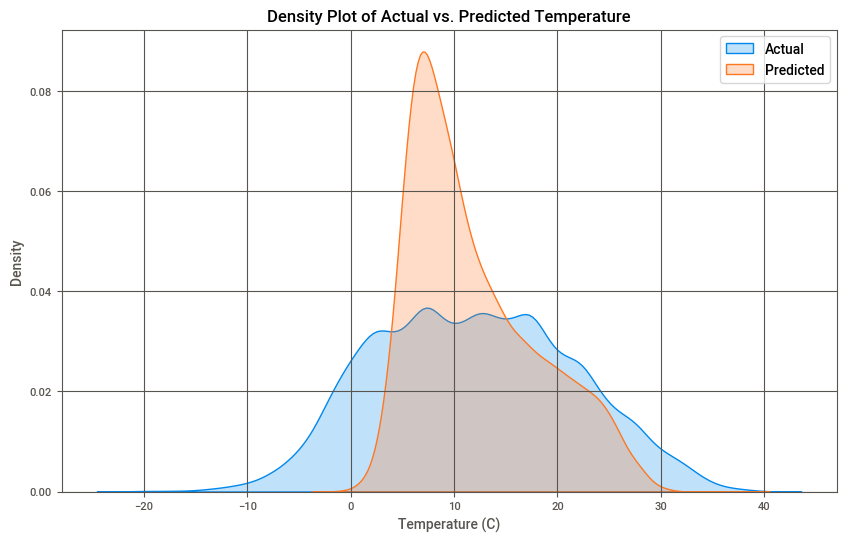

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.xlabel('Temperature (C)')
plt.title('Density Plot of Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

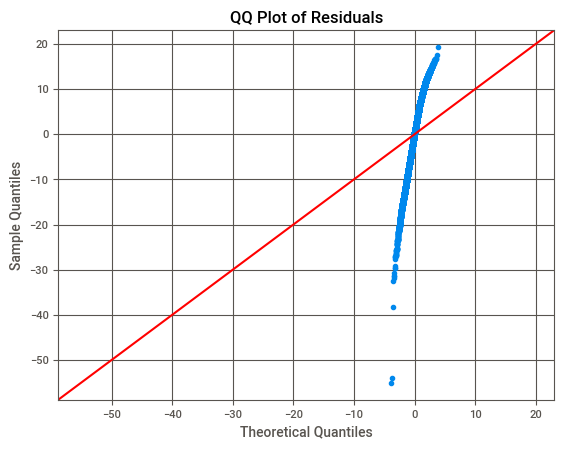

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()


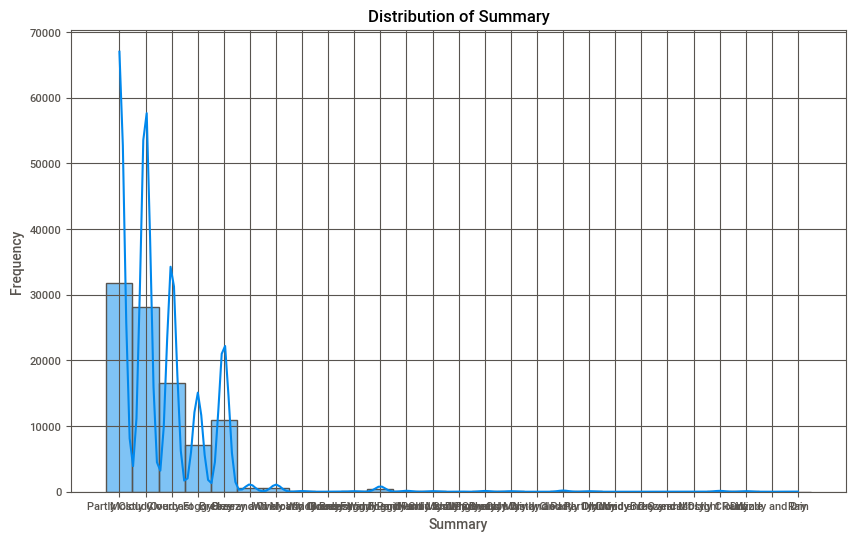

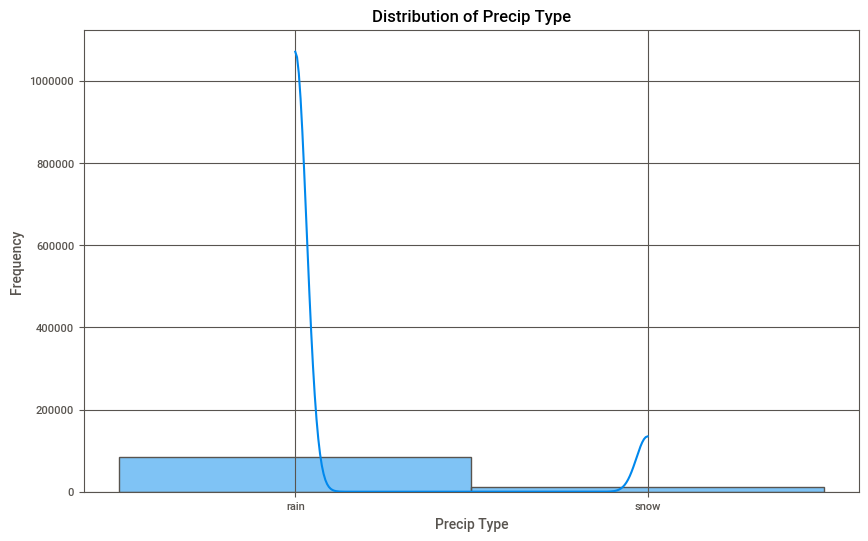

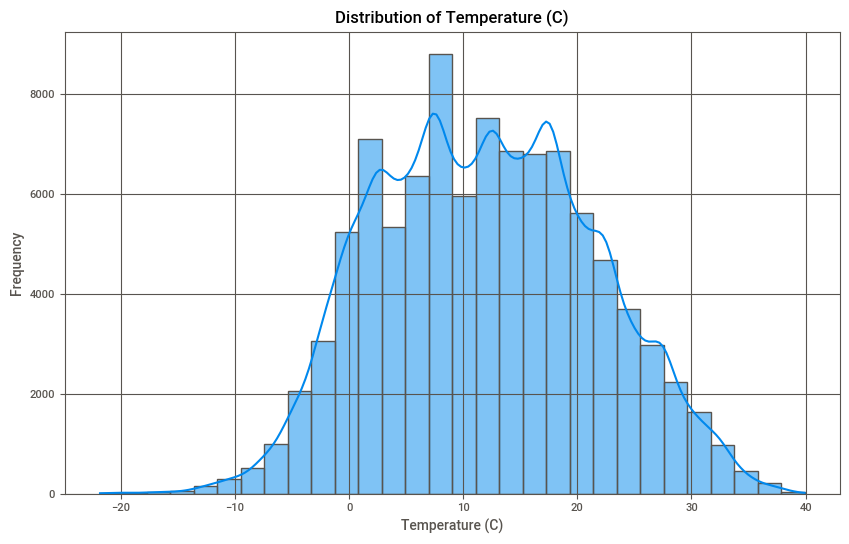

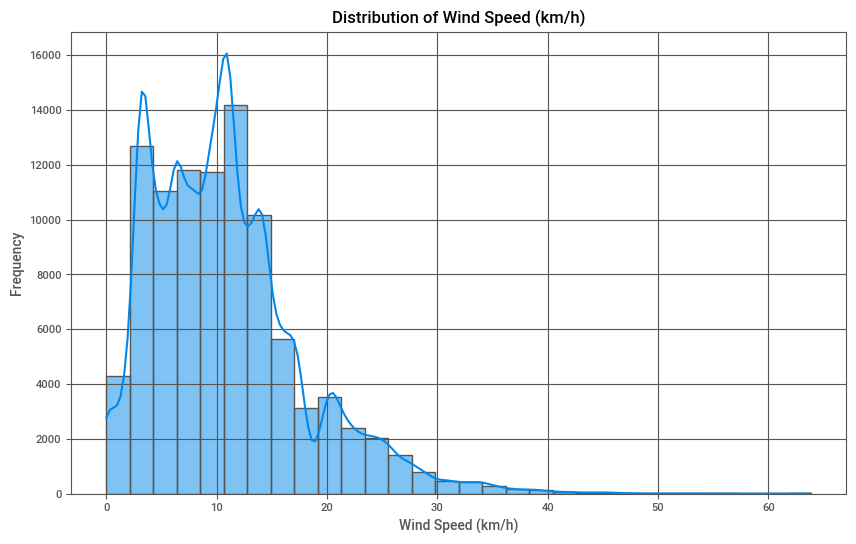

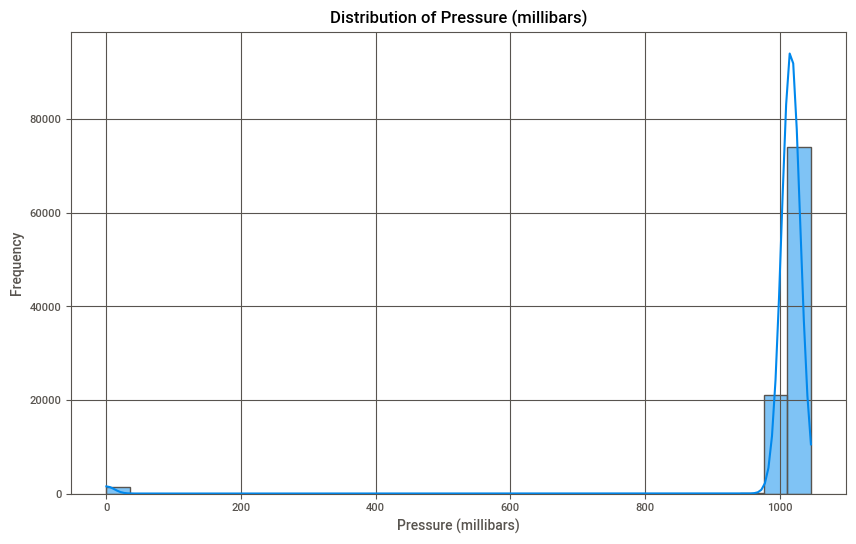

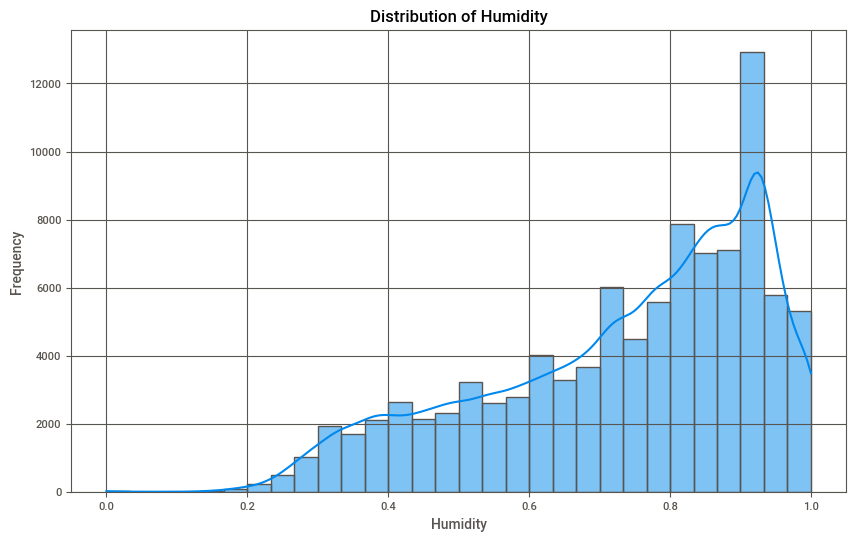

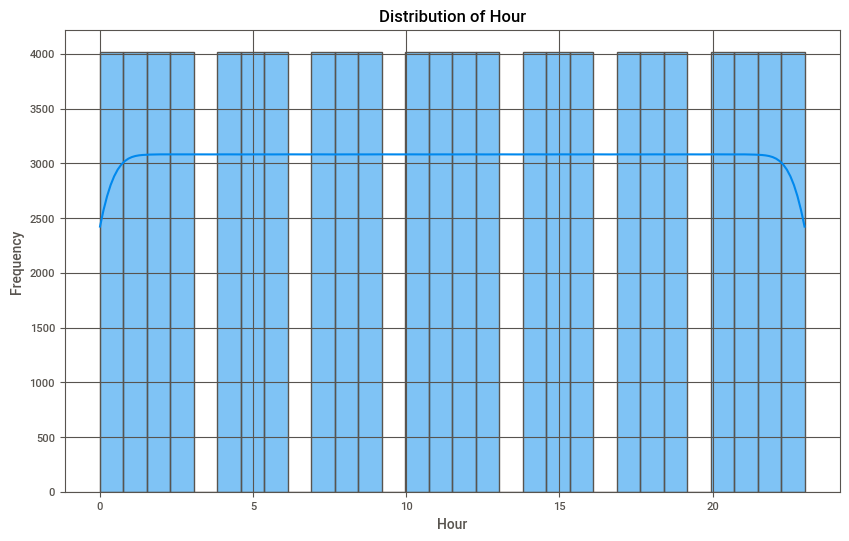

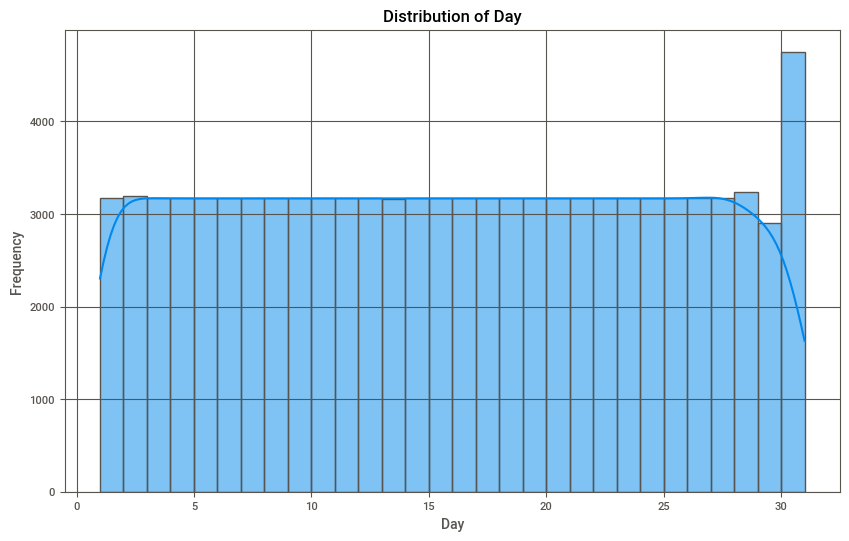

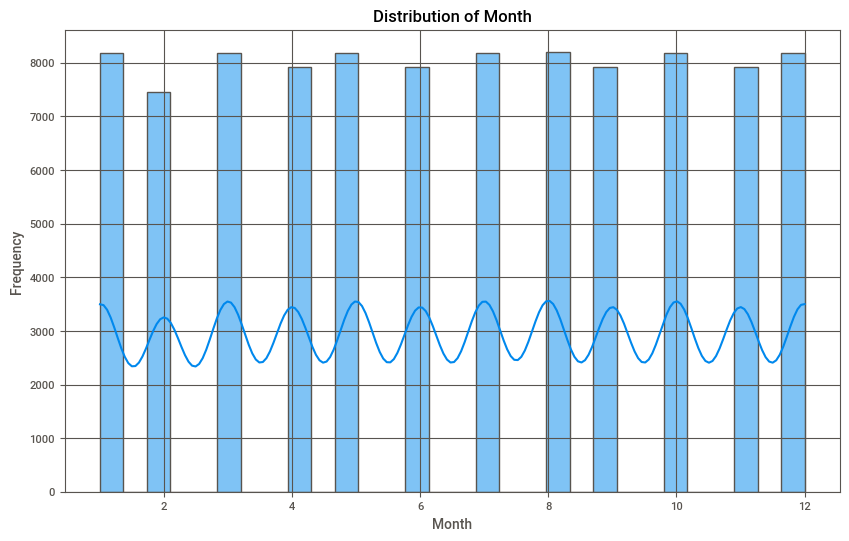

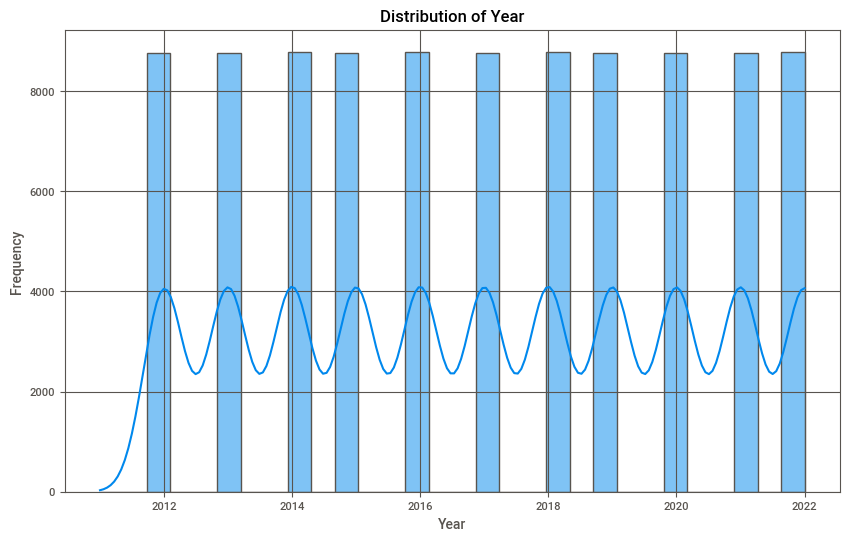

In [ ]:
# Histograms to show correlations between features
def plot_histograms(data, features, bins=30):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[feature], bins=bins, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# List of features to visualize
features = dataset.columns

# Plot histograms for the selected features
plot_histograms(dataset, features)

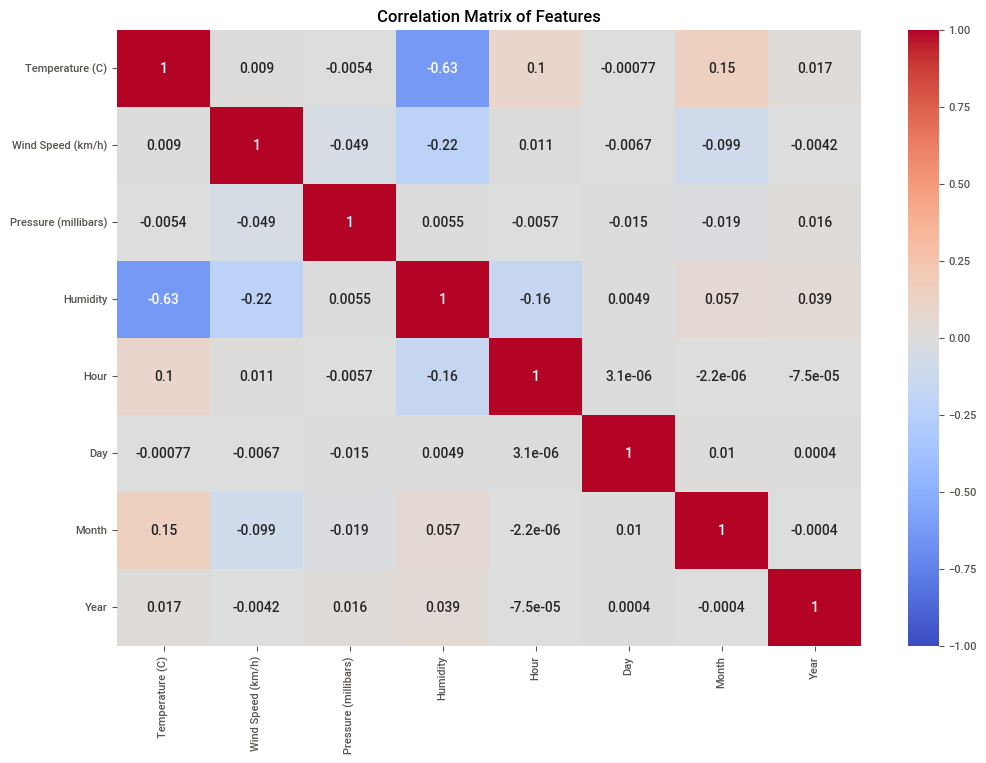

In [ ]:
# Select only numeric columns for correlation matrix
numeric_columns = dataset.select_dtypes(include=[float, int]).columns
correlation_matrix = dataset[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
pip install shap

In [ ]:
import shap
import pandas as pd
LinearRegression
from sklearn.model_selection import train_test_split

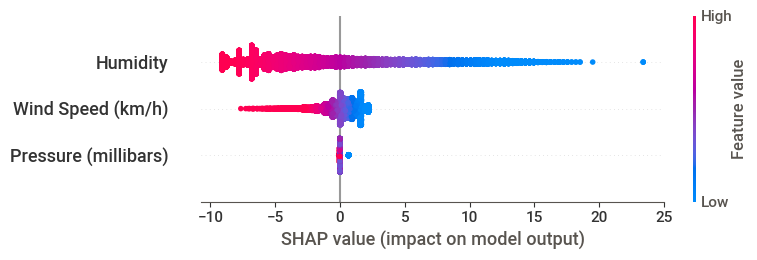

In [ ]:
# Initialize SHAP explainer - To understand feature impact of each feature on the predictions
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)